# Part II - Analysis of Ford GoBike System Data
## by Aryan Talathi

## Investigation Overview


> In this analysis, I have looked at the bike ride trends and biker type of the bay Ford GoBike share system in San Francisco Bay Area, California. The main focus was on trip duration, the time of the trip, day of the trip, the user types and genders.

## Dataset Overview

> This dataset contains the Ford GoBike's trip data for bike rides from February 2019. Some of the important features present in the dataset are:
>
> - Trip Duration
> - Trip Start Time
> - Trip End Time
> - Member Birth Year
> - Member Gender
> - User Type
> - Bike Sharing status
>
> Around 9.5K ride details were removed from the analysis due to missing values in some fields, data inconsistency, and outliers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174178 entries, 0 to 174177
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174178 non-null  int64  
 1   start_time               174178 non-null  object 
 2   end_time                 174178 non-null  object 
 3   start_station_id         174178 non-null  float64
 4   start_station_name       174178 non-null  object 
 5   end_station_id           174178 non-null  float64
 6   end_station_name         174178 non-null  object 
 7   bike_id                  174178 non-null  int64  
 8   user_type                174178 non-null  object 
 9   member_birth_year        174178 non-null  int64  
 10  member_gender            174178 non-null  object 
 11  bike_share_for_all_trip  174178 non-null  object 
 12  start_hour               174178 non-null  int64  
 13  start_day                174178 non-null  object 
 14  memb

In [4]:
# converting days to ordinal category
days = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
days_dtype = pd.api.types.CategoricalDtype(categories = days, ordered = True)
df['start_day'] = df['start_day'].astype(days_dtype)

In [5]:
blue = '#4eb3f2'
purple = '#936cf5'
orange = '#f5916c'
dark_blue = '#2a6ed4'
sns.set_palette('Accent')
plt.rcParams.update({'font.size': 12})

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations in the slideshow shoould be less than 50% of the number of visualizations in the exploratory analysis. For example, if the exploratory analysis (Part I) has 18 visualizations, the slideshow can have (3 - 8) visualizations. 


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots in the slideshow are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

## Distribution of Trip Duration

> The distribution of Trip Duration has a heavy right skew. Durations range from less than 1 minute to 1400+ minutes with median at around 9 min and mean at around 12 min. 
>
>(Applied Log transformation has made the plot telligible.)


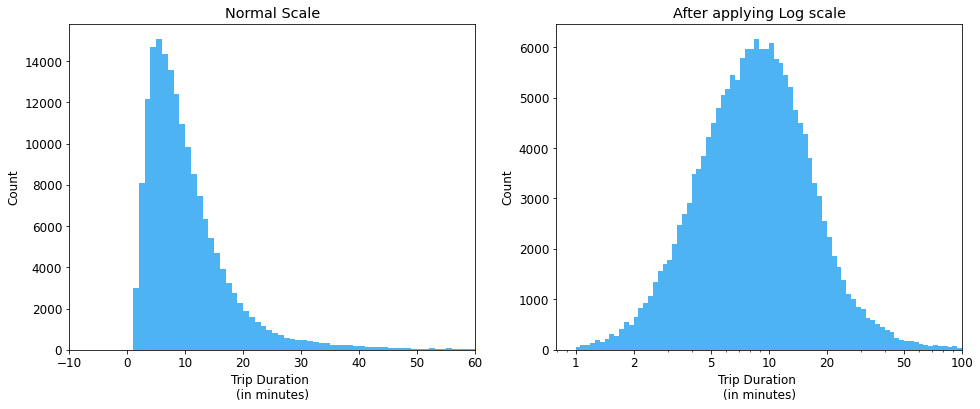

In [6]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1)
binsize = 1
bins = np.arange(0, df['duration_min'].max() + binsize, binsize)
plt.hist(data = df, x = 'duration_min', bins = bins, color = blue)
plt.xlim((-10,60))
plt.xlabel('Trip Duration \n(in minutes)')
plt.ylabel('Count')
plt.title('Normal Scale')

plt.subplot(1,2,2)
binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df.duration_min.describe()['max']) + binsize, binsize)
plt.hist(data = df, x = 'duration_min', bins = bins, color = blue)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500], [1, 2, 5, 10, 20, 50, 100, 200, 500]);
plt.xlim(0,100)
plt.xlabel('Trip Duration \n(in minutes)')
plt.ylabel('Count')
plt.title('After applying Log scale')
plt.show()

## Trip Duration for rides taken at every Hour of the Day

> The trip duration differs significantly wrt the hour of the day. The distribution here is almost a uni-modal one with a major peak in between 14th - 15th hour of the day. The duration is the least at around 2nd - 3rd hour at night. Bike rides between 8 am to 9 pm are the longest and nightime has the shortest rides.

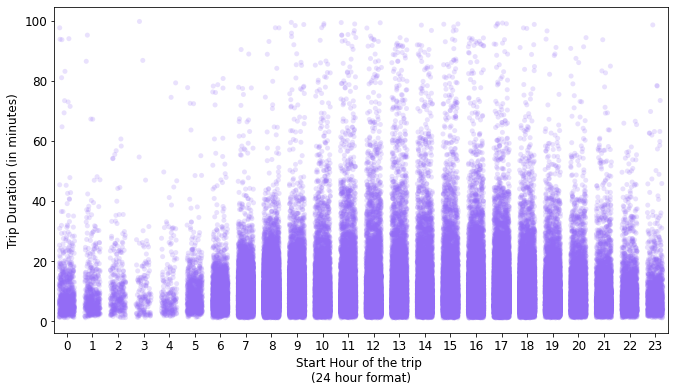

In [7]:
plt.figure(figsize = [11,6])
sns.stripplot(data = df, x = 'start_hour', y = 'duration_min', color = purple, jitter = 0.3, alpha = 1/5);
plt.xlabel('Start Hour of the trip \n(24 hour format)')
plt.xticks(np.arange(0,24), np.arange(0,24));
plt.ylabel('Trip Duration (in minutes)');

## Number of rides per Hour of the Day for Subsribers and Customers
> For Saturdays and Sundays, bike rides don't have any peak hours. More rides occur during mid-day hours for these days. But for weekdays, bike rides are more during peak hours.
> Subscribers take more trips on peak hours during week days. They take relatively less trips on weekends comapred to peak hours of week-days. Customers tend to take more trips on weekends and peak during mid day hours.

<Figure size 1080x504 with 0 Axes>

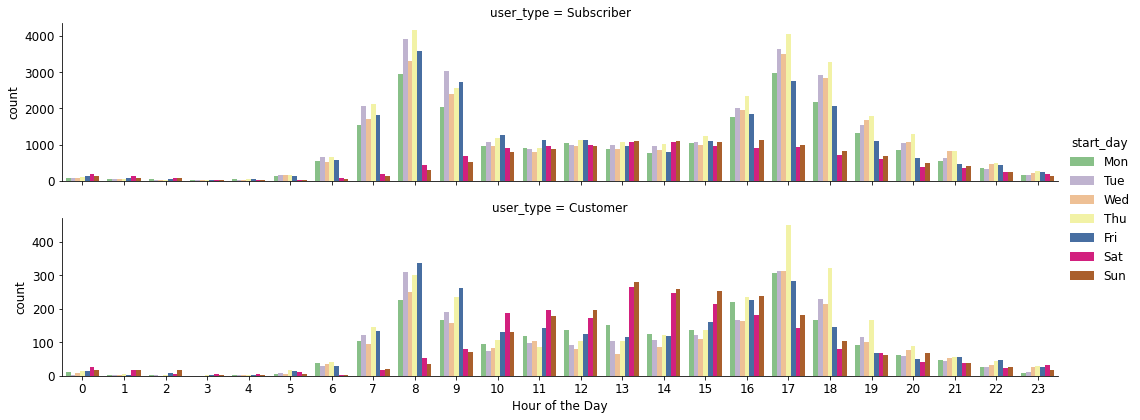

In [8]:
plt.figure(figsize = [15,7])
sns.catplot(data = df, x = 'start_hour', row = 'user_type',  hue = 'start_day', 
            height = 3, aspect = 5, sharey = False, kind = 'count');
plt.xlabel('Hour of the Day');

## Trip Duration against Member Age for each User Type
> There isn't any linear relation between Age and Duration. Although, it is seen that most of the high duration trips are done by people from 20-60 years age. Customers take long duration rides than Subscribers of relatively same age. Customers are generally younger than subscribers. Subscribers vary from 18-60yrs, whereas customers vary from 18-45yrs

In [9]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse: return np.log10(x)
    else: return np.power(10, x)

def hist2dgrid_1(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color');
    bins_x = np.arange(df['member_age'].min(), df['member_age'].max()+2, 2);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])),
              [1, 2, 5, 10, 20, 50, 100]);
def hist2dgrid_2(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color');
    bins_x = np.arange(df['start_hour'].min(), df['start_hour'].max()+1, 1);
    bins_y = np.arange(0, 2, 0.1);
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5);
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])),
              [1, 2, 5, 10, 20, 50, 100]);

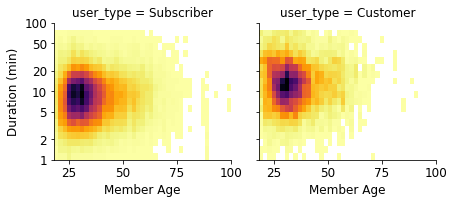

In [10]:
# create faceted heat maps
g = sns.FacetGrid(data = df, col = 'user_type', col_wrap = 4, height = 3);
g.map(hist2dgrid_1, 'member_age', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Member Age');
g.set_ylabels('Duration (min)');

## Trip Duration for every 24 Hours against 7 Days of the week, for each gender
> Duration of the rides is longer on weekends overall. For weekdays the duration is longer and more number of rides take place during the 8-10 and 15-20 hours intervals. For weekends rides are evenly distributed between 8-20 hour interval in general. Female bikers bike longer on average compared to male bikers.

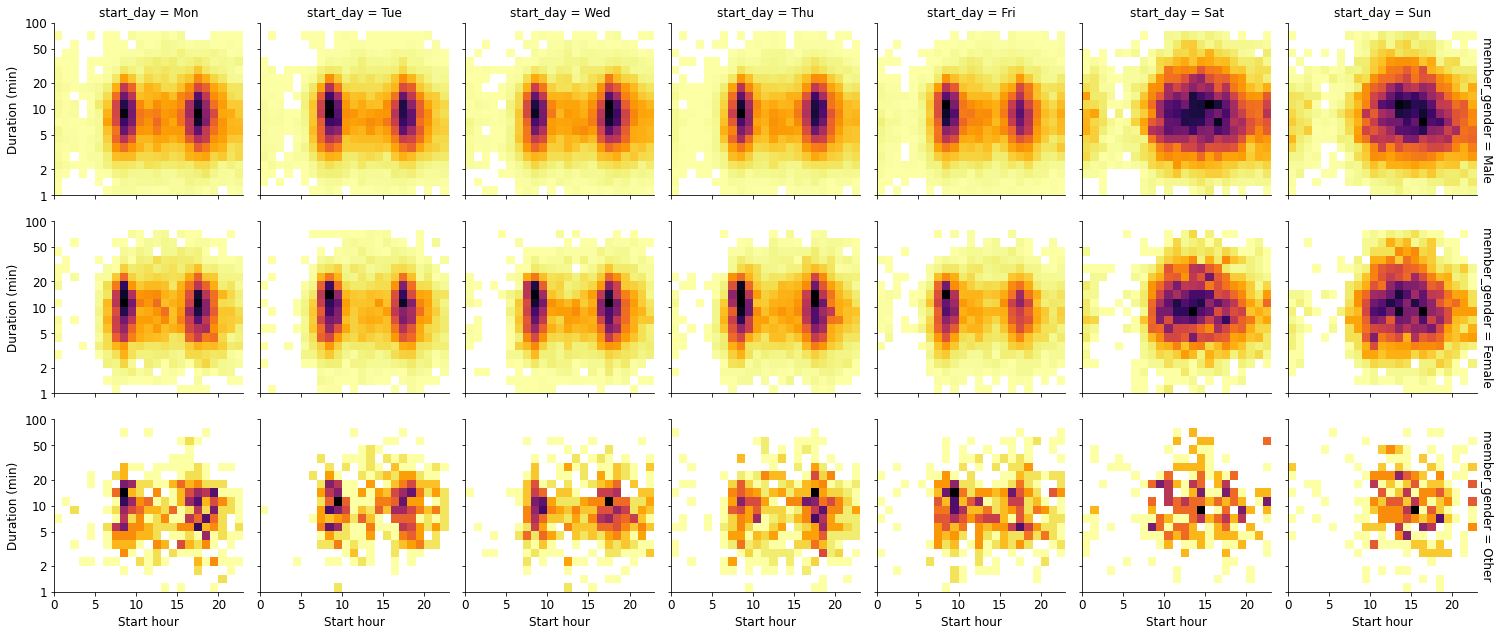

In [11]:
# create faceted heat maps
g = sns.FacetGrid(data = df, row = 'member_gender', col = 'start_day',  height = 3, margin_titles = True);
g.map(hist2dgrid_2, 'start_hour', 'log_duration_min', color = 'inferno_r');
g.set_xlabels('Start hour');
g.set_ylabels('Duration (min)');

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 974603 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
